In [1]:
from helpers import SEABORN_COLORS, create_plot
import os
import sys
import time
import datetime

from termcolor import colored, cprint

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sys
from os import listdir

import numpy as np
import pandas as pd  # Import Pandas and Numpy to create databases
import tensorflow as tf  # Import tensorflow to do tensor manipulations
from tensorflow import keras
from tensorflow.keras import Input, Model, layers, regularizers
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import csv
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
PATH_data = f"/mnt/d/UKB_toydata/"
PATH_GENO = f"{PATH_data}genotype"
PATH_usefull = f"{PATH_data}usefull_values_2"
PATH_usefull_accuracy = f"{PATH_usefull}/accuracy_looping2/"

In [3]:
dis = []
dims = []
type_pred = []
accuracy = []

for file in os.listdir(PATH_usefull_accuracy):
    if file.split('_')[4] != 'PRS':
        dis.append(file.split('_')[0])
        dims.append(int(file.split('_')[2]))
        type_pred.append(file.split('_')[3])
        accuracy.append(float(file.split('_')[-1].split('.pkl')[0]))
    else:
        bottles = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
        for bottle in bottles:
            dis.append(file.split('_')[0])
            dims.append(bottle)
            type_pred.append('classical PRS')
            accuracy.append(float(file.split('_')[-1].split('.pkl')[0]))

In [4]:
data = {
    "Disease": dis,
    "Dims": dims,
    "Type of prediction": type_pred,
    "Accuracy": accuracy
}

df = pd.DataFrame(data)

In [5]:
df

,Disease,Dims,Type of prediction,Accuracy
0,bc,2,test,0.744
1,bc,2,validation,0.642
2,bc,5,test,0.719
3,bc,5,validation,0.717
4,bc,10,test,0.732
...,...,...,...,...
226,t2d,30,classical PRS,0.620
227,t2d,35,classical PRS,0.620
228,t2d,40,classical PRS,0.620
229,t2d,45,classical PRS,0.620


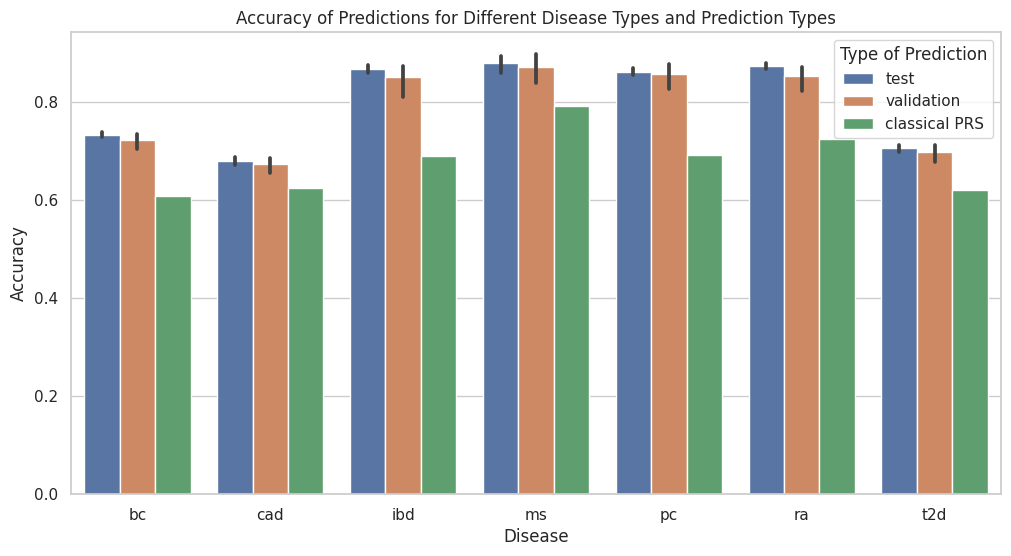

In [6]:
sns.set(style="whitegrid")
#sns.set_palette("rocket")
plt.figure(figsize=(12, 6))


# You can choose between a bar plot or a point plot based on your preference
# Bar Plot
sns.barplot(x="Disease", y="Accuracy", hue="Type of prediction", data=df)

# Point Plot
# sns.pointplot(x="Disease", y="Accuracy", hue="Type of prediction", data=df)

plt.title("Accuracy of Predictions for Different Disease Types and Prediction Types")
plt.ylabel("Accuracy")
plt.xlabel("Disease")
plt.legend(title="Type of Prediction", loc="upper right")
plt.show()

In [7]:
phenotypes = ['bc', 'cad', 'ibd', 'ms', 'pc', 'ra', 't2d']

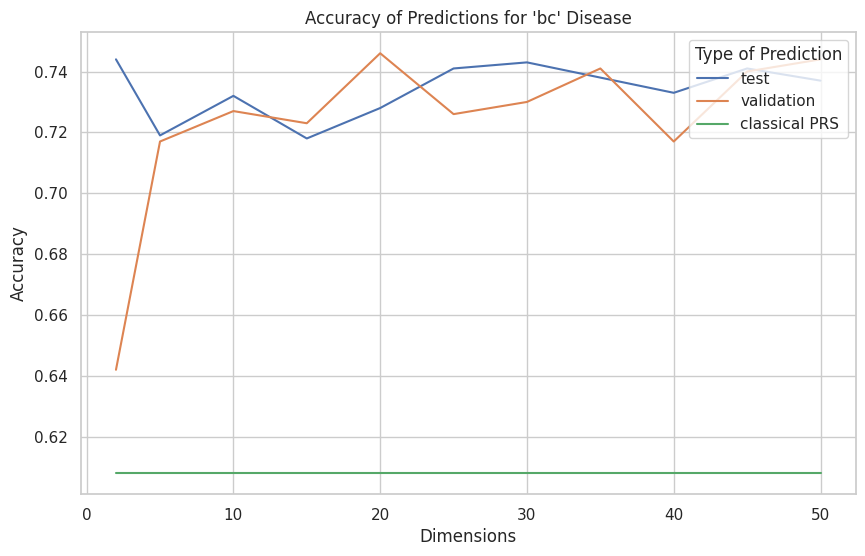

In [8]:
df = pd.DataFrame(data)
num = 0
# Filter the data for the "bc" disease
bc_data = df[df["Disease"] == phenotypes[num]]

# Create a line plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
#sns.set_palette("rocket")

sns.lineplot(x="Dims", y="Accuracy", hue="Type of prediction", data=bc_data)

plt.title(f"Accuracy of Predictions for '{phenotypes[num]}' Disease")
plt.ylabel("Accuracy")
plt.xlabel("Dimensions")
plt.legend(title="Type of Prediction", loc="upper right")
plt.show()